In [106]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import OneHotEncoder
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data"
columns = [
    "Status_of_existing_checking_account", "Duration_in_month", "Credit_history",
    "Purpose", "Credit_amount", "Savings_account_bonds", "Employment_since",
    "Installment_rate", "Personal_status_and_sex", "Other_debtors", "Present_residence_since",
    "Property", "Age_in_years", "Other_installment_plans", "Housing", "Number_of_existing_credits",
    "Job", "Number_of_people_liable", "Telephone", "Foreign_worker", "Target"
]

data = pd.read_csv(url, delimiter=' ', names=columns, header=None)
X = data.drop(columns=["Target"])
y = data["Target"]
y = y - 1
categorical_features = X.select_dtypes(include=["object"]).columns

encoder = OneHotEncoder(sparse_output=False, drop='first')
X_encoded = encoder.fit_transform(X[categorical_features])
X_encoded_df = pd.DataFrame(X_encoded, columns=encoder.get_feature_names_out(categorical_features))

X = X.drop(columns=categorical_features)
X = pd.concat([X.reset_index(drop=True), X_encoded_df.reset_index(drop=True)], axis=1)

X_train_calib, X_test, y_train_calib, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

X_train, X_calib, y_train, y_calib = train_test_split(X_train_calib, y_train_calib, test_size=0.1, random_state=42, stratify=y_train_calib)


In [107]:
print(len(X_calib))
print(len(X_train))
print(len(X_test))

80
720
200


In [108]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Accuracy: 0.79

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.93      0.86       140
           1       0.74      0.47      0.57        60

    accuracy                           0.79       200
   macro avg       0.77      0.70      0.72       200
weighted avg       0.78      0.79      0.77       200



In [ ]:
def InverseProbabilityNC(predicted_score, y):
  prob = np.zeros(y.size, dtype=np.float32)
  for i, y_ in enumerate(y):
    if y_ >= predicted_score.shape[1]:
      prob[i] = 0
    else:
      prob[i] = predicted_score[i, int(y_)]
  return 1 - prob

def compute_p_value(non_conformity_scores_train, non_conformity_scores_test):
  p_values = []
  if not isinstance(non_conformity_scores_test, list):
    non_conformity_scores_test = [non_conformity_scores_test]

  for i, test_point_conformity_score in enumerate(non_conformity_scores_test):
    p_value = (np.sum(non_conformity_scores_train >= test_point_conformity_score) + 1) / (len(non_conformity_scores_train)+1)
    p_values.append(p_value)  
  return np.array(p_values)

y_pred_calib = rf_model.predict(X_calib)
y_pred_score_calib = rf_model.predict_proba(X_calib)

y_pred_test = rf_model.predict(X_test)
y_pred_score_test = rf_model.predict_proba(X_test)
non_conformity_scores_calibration = InverseProbabilityNC(y_pred_score_calib,y_calib)
non_conformity_scores_y_test_class_0 = 1 - y_pred_score_test[0,0]
non_conformity_scores_y_test_class_1 = 1 - y_pred_score_test[0,1]

non_conformity_scores_calib_plus_test_0 = np.append(non_conformity_scores_calibration, non_conformity_scores_y_test_class_0)
non_conformity_scores_calib_plus_test_1 = np.append(non_conformity_scores_calibration, non_conformity_scores_y_test_class_1)
p_value_class_0 = compute_p_value(non_conformity_scores_calib_plus_test_0, non_conformity_scores_y_test_class_0)
p_value_class_1 = compute_p_value(non_conformity_scores_calib_plus_test_1, non_conformity_scores_y_test_class_1)

plt.figure(figsize=(12, 8), dpi=80)
plt.hist(np.sort(non_conformity_scores_calibration), label='Calibration set', alpha=0.6)
# single line
plt.vlines(x = non_conformity_scores_y_test_class_0, ymin = 0, ymax = 175, colors = 'green',
           label = 'Nonconformity score for Class 0')

plt.vlines(x = non_conformity_scores_y_test_class_1, ymin = 0, ymax = 175, colors = 'red',
           label = 'Nonconformity score for Class 1')

plt.grid(True)
plt.ylabel('Nonconformity value')
plt.title('Distribution of nonconformity values')

plt.legend( loc='upper right')
plt.show()


In [81]:
y_pred_calib = rf_model.predict(X_calib)
y_pred_score_calib = rf_model.predict_proba(X_calib)

y_pred_test = rf_model.predict(X_test)
y_pred_score_test = rf_model.predict_proba(X_test)


In [58]:
def InverseProbabilityNC(predicted_score, y):
  prob = np.zeros(y.size, dtype=np.float32)
  for i, y_ in enumerate(y):
    if y_ >= predicted_score.shape[1]:
      prob[i] = 0
    else:
      prob[i] = predicted_score[i, int(y_)]
  return 1 - prob


In [86]:
def compute_p_value(non_conformity_scores_train, non_conformity_scores_test):
  p_values = []
  if not isinstance(non_conformity_scores_test, list):
    non_conformity_scores_test = [non_conformity_scores_test]

  for i, test_point_conformity_score in enumerate(non_conformity_scores_test):
    p_value = (np.sum(non_conformity_scores_train >= test_point_conformity_score) + 1) / (len(non_conformity_scores_train)+1)
    p_values.append(p_value)  
  return np.array(p_values)


In [105]:
non_conformity_scores_calibration = InverseProbabilityNC(y_pred_score_calib,y_calib)


In [101]:
non_conformity_scores_y_test_class_0 = 1 - y_pred_score_test[0,0]
non_conformity_scores_y_test_class_1 = 1 - y_pred_score_test[0,1]


In [102]:
non_conformity_scores_calib_plus_test_0 = np.append(non_conformity_scores_calibration, non_conformity_scores_y_test_class_0)
non_conformity_scores_calib_plus_test_1 = np.append(non_conformity_scores_calibration, non_conformity_scores_y_test_class_1)
p_value_class_0 = compute_p_value(non_conformity_scores_calib_plus_test_0, non_conformity_scores_y_test_class_0)
p_value_class_1 = compute_p_value(non_conformity_scores_calib_plus_test_0, non_conformity_scores_y_test_class_1)


In [103]:
print(p_value_class_0)
print(p_value_class_1)


[0.54878049]
[0.13414634]


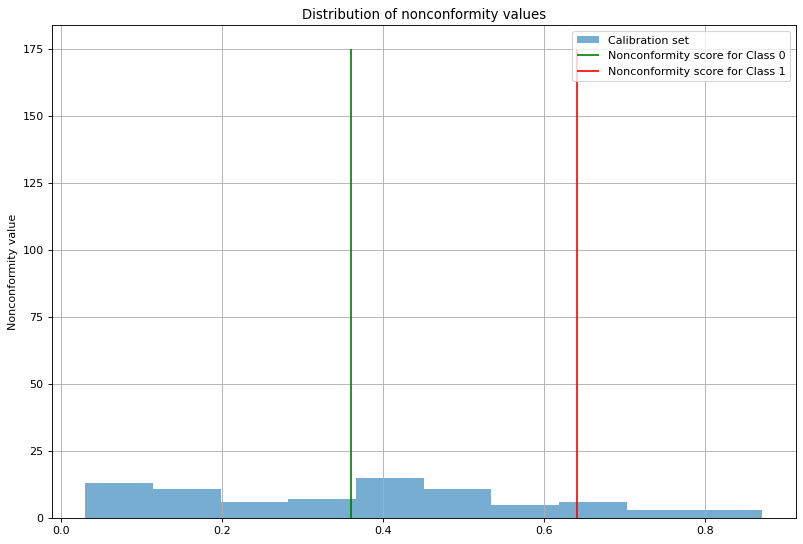

In [104]:
plt.figure(figsize=(12, 8), dpi=80)
plt.hist(np.sort(non_conformity_scores_calibration), label='Calibration set', alpha=0.6)
# single line
plt.vlines(x = non_conformity_scores_y_test_class_0, ymin = 0, ymax = 175, colors = 'green',
           label = 'Nonconformity score for Class 0')

plt.vlines(x = non_conformity_scores_y_test_class_1, ymin = 0, ymax = 175, colors = 'red',
           label = 'Nonconformity score for Class 1')

plt.grid(True)
plt.ylabel('Nonconformity value')
plt.title('Distribution of nonconformity values')

plt.legend( loc='upper right')
plt.show()

In [60]:
X_train_plus_test = pd.concat([X_train,pd.DataFrame(X_test.iloc[0]).T])
X_train_plus_test


,Duration_in_month,Credit_amount,Installment_rate,Present_residence_since,Age_in_years,Number_of_existing_credits,Number_of_people_liable,Status_of_existing_checking_account_A12,Status_of_existing_checking_account_A13,Status_of_existing_checking_account_A14,...,Property_A124,Other_installment_plans_A142,Other_installment_plans_A143,Housing_A152,Housing_A153,Job_A172,Job_A173,Job_A174,Telephone_A192,Foreign_worker_A202
828,36.0,8335.0,3.0,4.0,47.0,1.0,1.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
997,12.0,804.0,4.0,4.0,38.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
148,36.0,5371.0,3.0,2.0,28.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
735,36.0,3990.0,3.0,2.0,29.0,1.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
130,48.0,8487.0,1.0,2.0,24.0,1.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
545,24.0,1333.0,4.0,2.0,43.0,2.0,2.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
298,18.0,2515.0,3.0,4.0,43.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
417,18.0,8471.0,1.0,2.0,23.0,2.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
749,15.0,3029.0,2.0,2.0,33.0,1.0,1.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0


In [61]:
y_train_plus_test_0 = np.append(y_train, 0)
y_train_plus_test_1 = np.append(y_train, 1)


In [62]:
rf_model.fit(X_train_plus_test, y_train_plus_test_0)
y_pred_score_train_plus_test_0 = rf_model.predict_proba(X_train_plus_test)
rf_model.fit(X_train_plus_test, y_train_plus_test_1)
y_pred_score_train_plus_test_1 = rf_model.predict_proba(X_train_plus_test)



In [63]:
non_conformity_scores_train_plus_test_0 = InverseProbabilityNC(y_pred_score_train_plus_test_0, y_train_plus_test_0)
non_conformity_scores_train_plus_test_1 = InverseProbabilityNC(y_pred_score_train_plus_test_1, y_train_plus_test_1)


In [72]:
non_conformity_scores_y_train_class_0 = non_conformity_scores_train_plus_test_0[:-1]
non_conformity_scores_y_train_class_1 = non_conformity_scores_train_plus_test_1[:-1]

non_conformity_scores_y_test_class_0 = non_conformity_scores_train_plus_test_0[-1]
non_conformity_scores_y_test_class_1 = non_conformity_scores_train_plus_test_1[-1]


In [71]:
p_value_class_0 = compute_p_value(non_conformity_scores_y_train_class_0, non_conformity_scores_y_test_class_0)
p_value_class_1 = compute_p_value(non_conformity_scores_y_train_class_1, non_conformity_scores_y_test_class_1)


In [73]:
print('p-value for class 0: {}, p-value for class 1: {}'.format(p_value_class_0,p_value_class_1))


p-value for class 0: [0.4556804], p-value for class 1: [0.08364544]


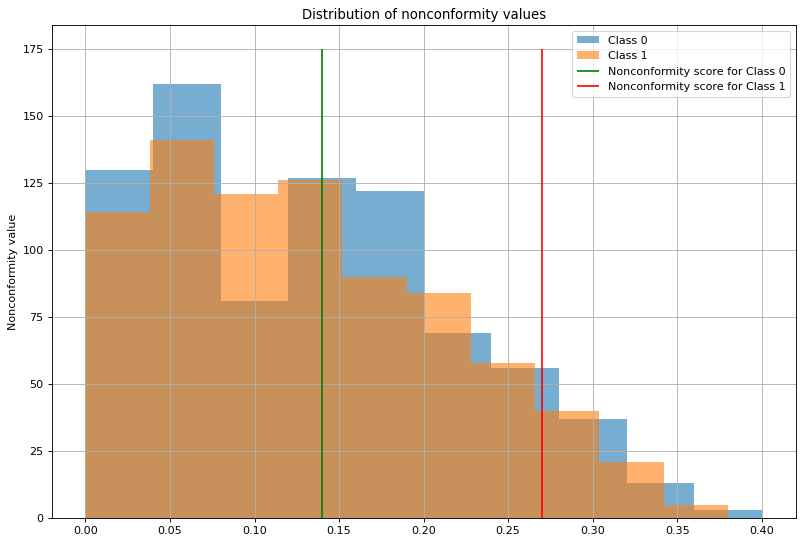

In [74]:
plt.figure(figsize=(12, 8), dpi=80)
plt.hist(np.sort(non_conformity_scores_y_train_class_0), label='Class 0', alpha=0.6)
plt.hist(np.sort(non_conformity_scores_y_train_class_1), label='Class 1', alpha=0.6)
# single line
plt.vlines(x = non_conformity_scores_y_test_class_0, ymin = 0, ymax = 175, colors = 'green',
           label = 'Nonconformity score for Class 0')

plt.vlines(x = non_conformity_scores_y_test_class_1, ymin = 0, ymax = 175, colors = 'red',
           label = 'Nonconformity score for Class 1')

plt.grid(True)
plt.ylabel('Nonconformity value')
plt.title('Distribution of nonconformity values')
 
plt.legend( loc='upper right')
plt.show()


In [227]:
import bisect
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

class InductiveConformalPredictor():
    def __init__(self, n_trees=100, s=2, gamma=1, labda=1, tree_max_depth=None, combination=1, data_name=None, random_state=None):
        self.n_trees = n_trees
        self.s = s
        self.labda = labda
        self.gamma = gamma
        self.combination = combination
        self.data_name = data_name
        self.w = np.ones(n_trees) / n_trees
        self.model = RandomForestClassifier(n_estimators=n_trees, max_depth=tree_max_depth, random_state=random_state)

    def fit(self, X_train, y_train, X_calib, y_calib):
        # Fit the model on the training set
        self.model.fit(X_train, y_train)

        # Store class information
        self.classes = self.model.classes_
        self.class_to_index = {c: i for i, c in enumerate(self.classes)}

        # Compute calibration nonconformity scores
        # For each calibration example:
        # nonconformity_score = 1 - p(correct_class|x_calib)
        prob_calib = self.model.predict_proba(X_calib)
        self.calibration_scores_by_class = {c: [] for c in self.classes}

        for i, true_class in enumerate(y_calib):
            class_idx = self.class_to_index[true_class]
            # Nonconformity score for this instance is 1 - probability of the true class
            nonconformity_score = 1 - prob_calib[i, class_idx]
            self.calibration_scores_by_class[true_class].append(nonconformity_score)

        # Sort the calibration scores for each class
        for c in self.classes:
            self.calibration_scores_by_class[c] = np.sort(self.calibration_scores_by_class[c])

        return self

    def _nonconformity_score_for_class(self, X, class_idx):
        # Nonconformity score for a class at test time is 1 - p(class|x_test)
        prob = self.model.predict_proba(X)
        return 1 - prob[:, class_idx]

    def predict_proba(self, X):
        # This method computes the conformal p-values for each class on the test set.
        # For a test point, p-value for class c_j is:
        # p_j = (|{i: alpha_i >= alpha_test_j}| + 1) / (N_j + 1)
        # where alpha_test_j = nonconformity for class j at test point
        # and alpha_i are calibration scores for class j.

        n_test = X.shape[0]
        p_values = np.zeros((n_test, len(self.classes)))

        for j, c in enumerate(self.classes):
            test_scores = self._nonconformity_score_for_class(X, j)
            sorted_scores = self.calibration_scores_by_class[c]
            N_j = len(sorted_scores)

            # For each test score, find how many calibration scores are >= test_score
            # Using bisect_left gives the insertion point to keep order.
            # Count = N_j - index
            # p-value = (Count + 1)/(N_j + 1)
            for i, score in enumerate(test_scores):
                idx = bisect.bisect_left(sorted_scores, score)
                count = N_j - idx
                p_values[i, j] = (count + 1) / (N_j + 1) if N_j > 0 else 1.0
                # If no calibration examples for this class, by definition p=1 (fully uncertain).

        return p_values

    def predict(self, X, alpha=0.05):
        # Predict the conformal set of classes whose p-value > alpha
        p_values = self.predict_proba(X)
        print(p_values)
        # Threshold at alpha to get sets of classes
        print((p_values > alpha).astype(int))
        conformal_sets = (p_values > alpha).astype(int)

        # Convert binary matrix to sets of classes
        mlb = MultiLabelBinarizer(classes=self.classes)
        mlb.fit([self.classes])
        pred = mlb.inverse_transform(conformal_sets)

        return pred


In [228]:
cfp = InductiveConformalPredictor()
cfp.fit(X_train, y_train, X_calib, y_calib)
cfp_preds = cfp.predict(X_test, alpha=0.1)
rf_preds = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, rf_preds)
# print(f"Accuracy: {accuracy:.2f}")
# print("\nClassification Report:")
# print(classification_report(y_test, y_pred))
# print(cfp_preds)
# print(rf_preds)


[[0.50877193 0.2       ]
 [0.70175439 0.08      ]
 [0.03508772 0.92      ]
 [0.29824561 0.56      ]
 [0.38596491 0.4       ]
 [0.42105263 0.32      ]
 [0.50877193 0.16      ]
 [0.56140351 0.12      ]
 [0.1754386  0.72      ]
 [0.73684211 0.08      ]
 [0.92982456 0.04      ]
 [0.57894737 0.12      ]
 [1.         0.04      ]
 [0.52631579 0.12      ]
 [0.50877193 0.12      ]
 [0.78947368 0.04      ]
 [0.78947368 0.08      ]
 [0.85964912 0.04      ]
 [0.73684211 0.08      ]
 [0.87719298 0.04      ]
 [0.78947368 0.04      ]
 [0.73684211 0.08      ]
 [0.73684211 0.08      ]
 [0.03508772 0.92      ]
 [0.12280702 0.72      ]
 [0.47368421 0.32      ]
 [1.         0.04      ]
 [0.33333333 0.48      ]
 [0.73684211 0.08      ]
 [0.78947368 0.04      ]
 [0.64912281 0.08      ]
 [0.59649123 0.08      ]
 [0.42105263 0.32      ]
 [0.01754386 1.        ]
 [0.40350877 0.36      ]
 [0.03508772 0.92      ]
 [0.12280702 0.72      ]
 [0.07017544 0.88      ]
 [0.73684211 0.08      ]
 [0.01754386 1.        ]


In [218]:
def u65_score(y_test, y_pred):
        imprecise_predictions = y_pred
        indeterminate_instance = (imprecise_predictions == -1)
        determinate_instance = (imprecise_predictions != -1)
        
        # calculate single-set length
        single_set_length = len(y_test) - sum(indeterminate_instance)
        
        # calculate determinacy
        determinacy = single_set_length/len(y_test)
        determinacy = round(determinacy*100, 2)
        
        # calculate single-set accuracy
        single_set_accuracy = sum(y_test[determinate_instance]==imprecise_predictions[determinate_instance])/single_set_length
        single_set_accuracy = round(single_set_accuracy*100, 2)
        
        # claculate u65
        u65_score = round(65 + (single_set_accuracy - 65)*determinacy/100, 2)
        return u65_score, single_set_accuracy


In [221]:
transformed_predictions = [
    -1 if p == (0, 1) else p[0]  # Convert (0, 1) to -1, and unpack single-element tuples
    for p in cfp_preds
]
u65, single_set_acc = u65_score(y_test, rf_preds)
print(u65)
u65, single_set_acc = u65_score(y_test, np.array(transformed_predictions))
print(u65)
print(single_set_acc)



79.0
72.8
85.53
